# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it.

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided:
* charges: the medical cost

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving insurance.csv to insurance (4).csv


### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [ ]:
# your code
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Q2. Check whether there are missing values in this dataset.

In [ ]:
# your code
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature.


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

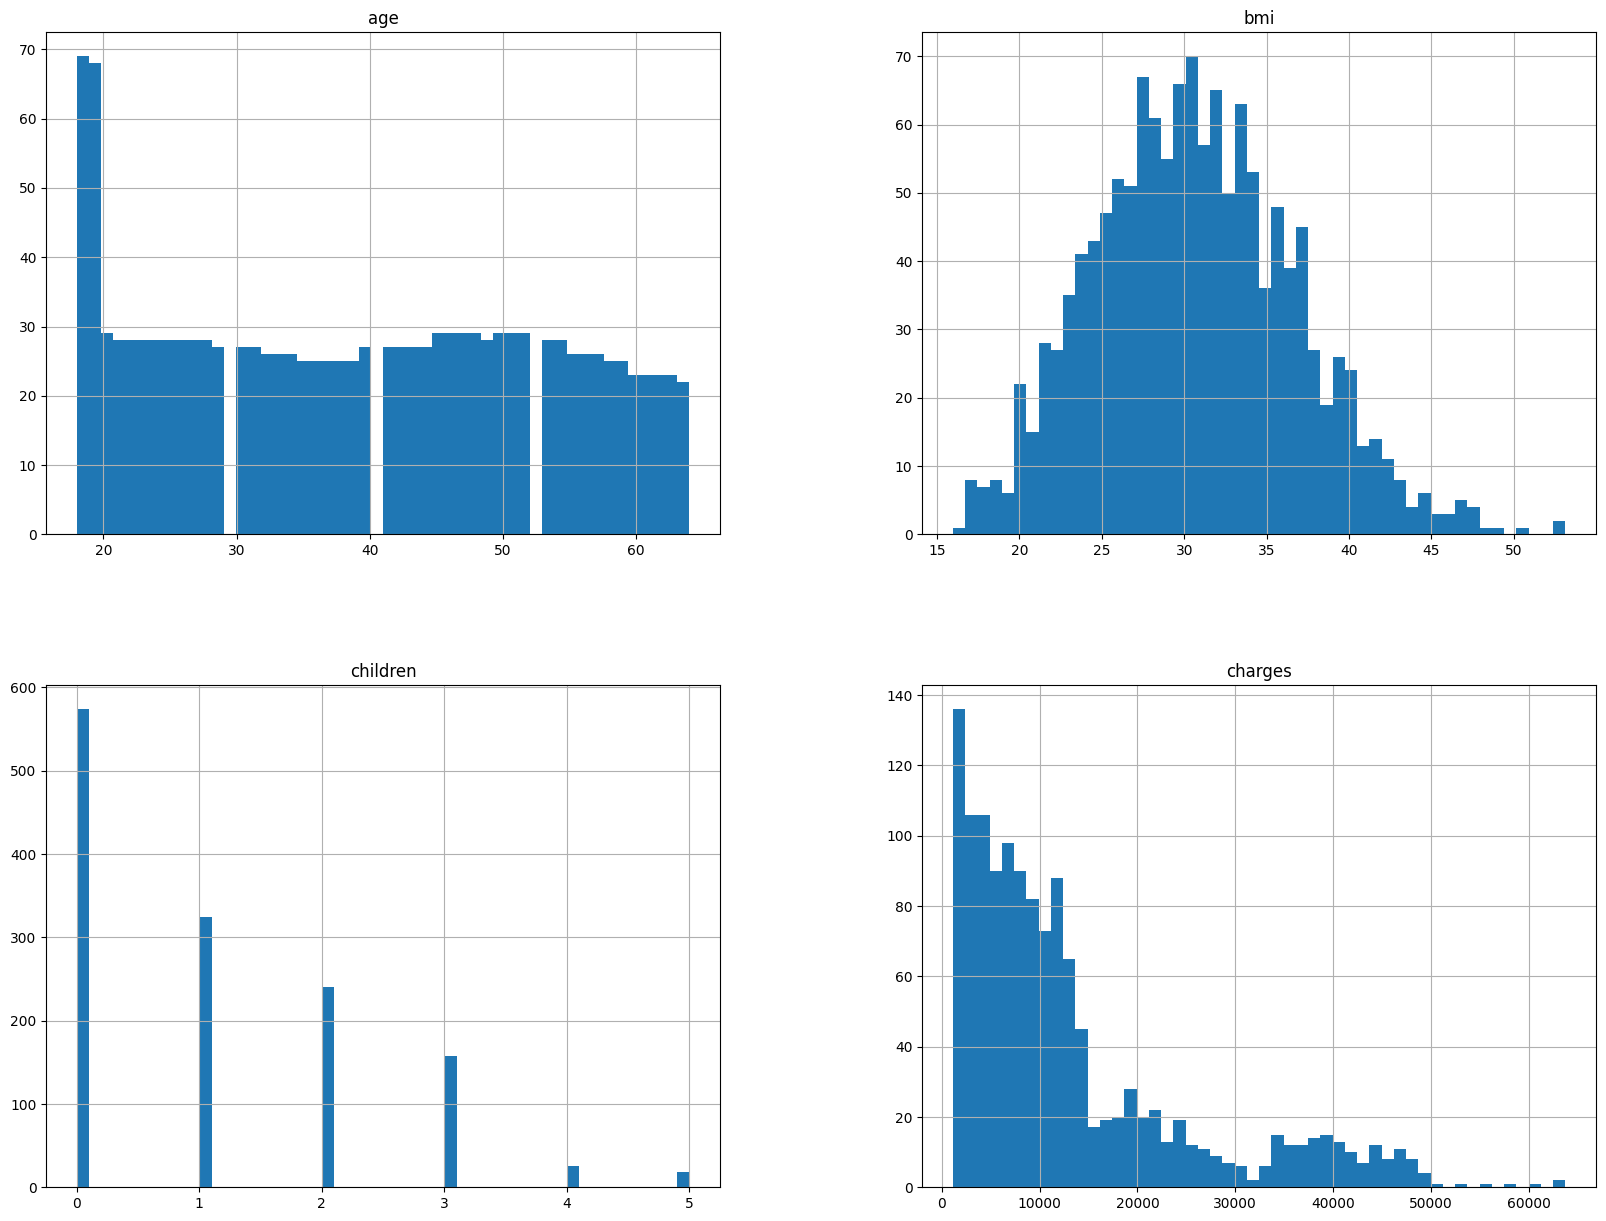

In [ ]:
# your code
df.hist(bins=50, figsize=(20,15))


### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [ ]:
# your code
labelencoder = LabelEncoder()

#sex
df['sex'] = labelencoder.fit_transform(df['sex'])

#children
df['children'] = labelencoder.fit_transform(df['children'])

#region
df['region'] = labelencoder.fit_transform(df['region'])

#smoker
df['smoker'] = labelencoder.fit_transform(df['smoker'])

hcorr = df.corr()
hcorr.style.background_gradient()

#to only get numerical values
df.corr(numeric_only=True)


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

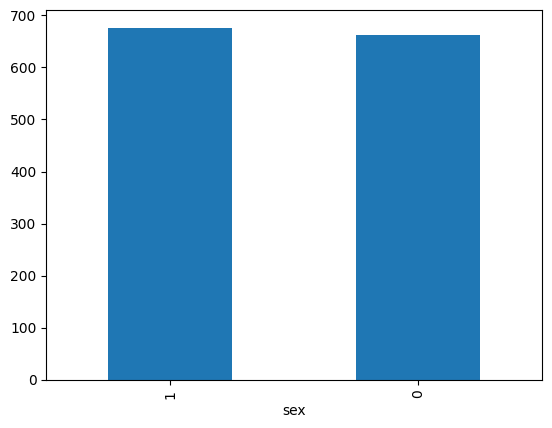

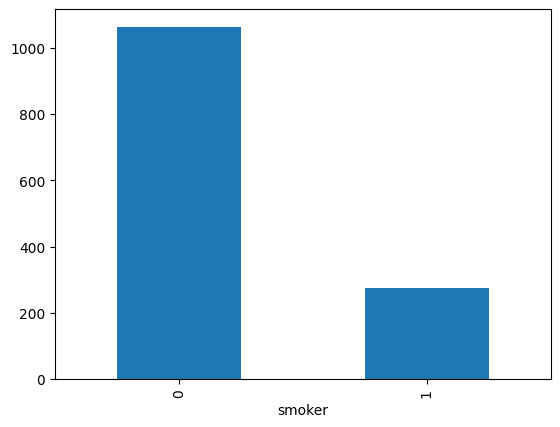

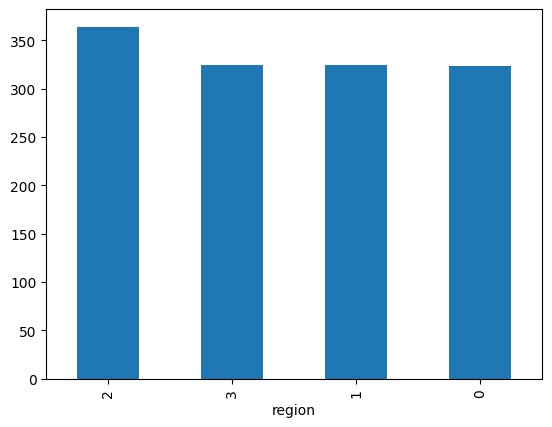

In [ ]:
# your code

df['sex'].value_counts().plot(kind = 'bar')
plt.show()

df['smoker'].value_counts().plot(kind = 'bar')
plt.show()

df['region'].value_counts().plot(kind = 'bar')
plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [ ]:
# your code
from sklearn.preprocessing import OneHotEncoder

print(df["sex"][0])
onehotencoder = OneHotEncoder(sparse=False)
result = onehotencoder.fit_transform(df[['sex']])
print(result[0,:])

result = onehotencoder.fit_transform(df[['children']])
print(result[0,:])

result = onehotencoder.fit_transform(df[['region']])
print(result[0,:])

0
[1. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Q7. Normalize all numerical features

In [ ]:
# your code
from sklearn.preprocessing import OneHotEncoder
np.set_printoptions(precision=4)

X = df.values[0:-1, 0:-1].astype(dtype=np.float32)
print('Original data')
print(X)

x_min = X.min(axis=0)
x_max = X.max(axis=0)
print('min and max')
print(x_min)
print(x_max)

X = (X-x_min)/(x_max-x_min)
print('Scaling data')
print(X)

Original data
[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   31.92  0.    0.    0.  ]
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]]
min and max
[18.    0.   15.96  0.    0.    0.  ]
[64.    1.   53.13  5.    1.    3.  ]
Scaling data
[[0.0217 0.     0.3212 0.     1.     1.    ]
 [0.     1.     0.4791 0.2    0.     0.6667]
 [0.2174 1.     0.4584 0.6    0.     0.6667]
 ...
 [0.     0.     0.4294 0.     0.     0.    ]
 [0.     0.     0.562  0.     0.     0.6667]
 [0.0652 0.     0.2647 0.     0.     1.    ]]


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.